In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
import scipy

# Gradient Descent

In [2]:
def f(w):
    return (w[0]**2 + w[1] - 11)**2 + (w[0] + w[1]**2 - 7)**2

In [3]:
def grad_desc(f, x, gamma=.0001, epsilon=.0001, dx_size=.0001, max_iterations=10000):
    x = np.array(x, dtype=np.float)
    fx = f(x)
    dx = np.ones(x.size, dtype=np.float)
    runs = 0
    path = [x]
    while np.linalg.norm(dx) > epsilon and runs < max_iterations:
#         print(runs)
        for i, xi in enumerate(x):
            fx = f(x)
            x[i] += dx_size
            dfx = f(x)
            dx[i] = (dfx - fx)/dx_size
            x[i] -= dx_size
        x = x - gamma * dx
#         print(x, dx)
        runs += 1
        path.append(x)
#     print(runs)
    return x, runs, path

In [4]:
x0 = [0, -4]
xmin, runs, path = grad_desc(f, x0, gamma=.005)
print("With a gamma of .005:")
print("The minimum value computed is {}".format(xmin))
print("It took the algorithm {} runs".format(runs))

With a gamma of .005:
The minimum value computed is [-3.77937729 -3.28325699]
It took the algorithm 52 runs


In [5]:
x0 = [0, -4]
xmin, runs, path = grad_desc(f, x0, gamma=.01)
print("With a gamma of .01:")
print("The minimum value computed is {}".format(xmin))
print("It took the algorithm {} runs".format(runs))

With a gamma of .01:
The minimum value computed is [-3.77937756 -3.28325742]
It took the algorithm 24 runs


In [6]:
paths = []
for x0 in [[0, -4], [.5, -4], [0, 4], [.5, 4]]:
    print('x0 is {}'.format(x0))
    xmin, runs, path = grad_desc(f, x0, gamma=.01)
    paths.append(path)
    print("The minimum value computed is {}".format(xmin))
    print("The value of f(xmin) is {}".format(f(xmin)))
    print("It took the algorithm {} runs\n".format(runs))
    

x0 is [0, -4]
The minimum value computed is [-3.77937756 -3.28325742]
The value of f(xmin) is 3.526105401378072e-07
It took the algorithm 24 runs

x0 is [0.5, -4]
The minimum value computed is [ 3.58438069 -1.84816286]
The value of f(xmin) is 1.503495580098134e-07
It took the algorithm 37 runs

x0 is [0, 4]
The minimum value computed is [-2.80516682  3.13126329]
The value of f(xmin) is 1.7773379073841826e-07
It took the algorithm 25 runs

x0 is [0.5, 4]
The minimum value computed is [2.99995568 1.99997779]
The value of f(xmin) is 1.0076679110329162e-07
It took the algorithm 50 runs



For all of the $x_0$, a different $x_{min}$ is found, but the value of $f(x_{min}) \approx 0$, which indicates that the minima are likely multiple global minima (or very similar local minima).

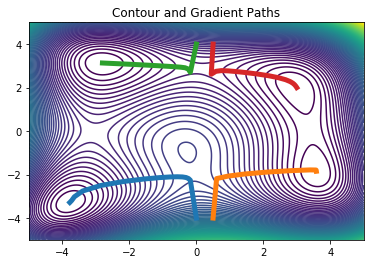

In [7]:
num = 1001
X = Y = np.linspace(-5, 5, num)
Z = [[f([x, y]) for x in X] for y in Y]
plt.contour(X, Y, Z, 100)
for path in paths:
    plt.plot([p[0] for p in path], [p[1] for p in path], linewidth=5)
plt.title("Contour and Gradient Paths")
plt.show()

# Parameter Estimation

In [8]:
mu = np.array([-1, 0, 4, 1, .5])
C = 2*np.eye(5)
errors = []
Ns = [10**i for i in range(1, 7)]

for N in Ns:
    x = list(range(N))
    samples = scipy.stats.multivariate_normal(mean=mu, cov=C).rvs(size=(N))
    sample_mu = np.mean(samples, axis=0)
    error = np.linalg.norm(mu-sample_mu)
    print("For N={}:".format(N))
    print("The estimate of mu is {}".format(sample_mu))
    print("The error is {}\n".format(error))
    errors.append(error)

AttributeError: module 'scipy' has no attribute 'stats'

In [ ]:
plt.loglog(Ns, errors)
plt.xlabel('N')
plt.ylabel('error(N)')
plt.show()

As the number of samples increases, the error between the sample mean and the true mean decreases